In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

C:\Users\rodri\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Para realizar nossa regressão, selecionamos as informações a partir de 2013 de nosso dataframe, além dos fatores que desejamos analisar.

In [3]:
dados =  pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
dados_filtrado = dados.loc[:, ["Name", "Platform","Year_of_Release","Genre","Publisher","Global_Sales","Critic_Score"]].dropna()
dados_filtrado2013 = dados_filtrado[dados_filtrado.Year_of_Release>=2013]



Em nosso caso, o y que desejamos encontrar é as vendas globais do jogo. Já o x é todas as variáveis restantes do dataframe. Contudo, algumas dessas informações são qualitativas e não quantitativas, sendo necessário fazer uma "conversão":

In [4]:
genero = dados_filtrado2013['Genre'].str.get_dummies()
plataforma = dados_filtrado2013['Platform'].str.get_dummies()
publisher = dados_filtrado2013['Publisher'].str.get_dummies()


A partir disso, utilizamos o join para atualizar a tabela com as informações quantitativas obtidas com a conversão:

In [5]:
df = dados_filtrado2013.join(genero,how = 'inner', rsuffix = '.')
df

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Action,Adventure,Fighting,Misc,Platform.,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.04,97.0,1,0,0,0,0,0,0,0,0,0,0,0
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.27,97.0,1,0,0,0,0,0,0,0,0,0,0,0
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,12.61,97.0,1,0,0,0,0,0,0,0,0,0,0,0
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,10.25,73.0,0,0,0,0,0,0,0,0,1,0,0,0
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,9.36,71.0,0,0,0,0,0,0,0,0,1,0,0,0
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,8.57,82.0,0,0,0,0,0,0,0,0,0,0,1,0
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,7.66,83.0,0,0,0,0,0,0,0,0,1,0,0,0
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,7.59,85.0,0,0,0,0,0,0,0,0,0,0,1,0
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,7.16,87.0,0,0,0,0,0,0,0,1,0,0,0,0
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,7.09,88.0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
df2 = df.join(plataforma,how = 'inner', rsuffix = '.')


In [7]:
df3 = df.join(publisher,how = 'inner', rsuffix = '.')
df3

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Action,Adventure,Fighting,...,Telltale Games,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Unknown,Warner Bros. Interactive Entertainment,Xseed Games,Yacht Club Games,inXile Entertainment
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.04,97.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.27,97.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,12.61,97.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,10.25,73.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,9.36,71.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,8.57,82.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,7.66,83.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,7.59,85.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,7.16,87.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,7.09,88.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Posteriormente, retiramos as informações qualitativas ainda presentes no dataframe:

In [8]:
df_final = df3.drop([ 'Platform', 'Year_of_Release', 'Genre', 'Publisher'], axis = 1)
df_final

,Name,Global_Sales,Critic_Score,Action,Adventure,Fighting,Misc,Platform.,Puzzle,Racing,...,Telltale Games,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Unknown,Warner Bros. Interactive Entertainment,Xseed Games,Yacht Club Games,inXile Entertainment
16,Grand Theft Auto V,21.04,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Grand Theft Auto V,16.27,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Theft Auto V,12.61,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,Call of Duty: Ghosts,10.25,73.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,Call of Duty: Ghosts,9.36,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,FIFA 16,8.57,82.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Call of Duty: Advanced Warfare,7.66,83.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,FIFA 17,7.59,85.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Fallout 4,7.16,87.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,Mario Kart 8,7.09,88.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Logo após a filtragem dos dados, utilizamos a função de regressão:

In [9]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [10]:
A =df_final.drop(['Global_Sales','Name'], axis = 1)
#A.columns
X_ = df_final[['Critic_Score', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform.',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', '505 Games', 'Activision', 'Activision Blizzard',
       'Agatsuma Entertainment', 'Aksys Games', 'Alternative Software',
       'Arc System Works', 'ArtDink', 'Astragon', 'Atari', 'Atlus',
       'Avanquest', 'Bethesda Softworks', 'Bigben Interactive',
       'Bohemia Interactive', 'CCP', 'Capcom', 'City Interactive',
       'Codemasters', 'Compile Heart', 'Crytek', 'D3Publisher',
       'Daedalic Entertainment', 'Deep Silver', 'Devolver Digital',
       'Disney Interactive Studios', 'Dusenberry Martin Racing',
       'Electronic Arts', 'Focus Home Interactive', 'From Software', 'FuRyu',
       'FuRyu Corporation', 'Gearbox Software', 'GungHo',
       'Harmonix Music Systems', 'Headup Games', 'Hello Games', 'Idea Factory',
       'Idea Factory International', 'Insomniac Games',
       'Introversion Software', 'Kalypso Media', 'Koch Media',
       'Konami Digital Entertainment', 'Little Orbit', 'Majesco Entertainment',
       'Marvelous Entertainment', 'Marvelous Interactive', 'Microids',
       'Microsoft Game Studios', 'Milestone S.r.l', 'Milestone S.r.l.',
       'NCSoft', 'Namco Bandai Games', 'Nintendo', 'Nippon Ichi Software',
       'Nordic Games', 'PQube', 'Paradox Development', 'Paradox Interactive',
       'Rebellion Developments', 'Revolution Software', 'Rising Star Games',
       'Screenlife', 'Sega', 'Slightly Mad Studios', 'Sold Out',
       'Sony Computer Entertainment', 'Sony Computer Entertainment America',
       'Sony Computer Entertainment Europe', 'Square Enix', 'Stainless Games',
       'System 3', 'THQ', 'Take-Two Interactive', 'Tecmo Koei',
       'Telltale Games', 'Trion Worlds', 'Tripwire Interactive',
       'Tru Blu Entertainment', 'Ubisoft', 'Unknown',
       'Warner Bros. Interactive Entertainment', 'Xseed Games',
       'Yacht Club Games', 'inXile Entertainment']]
Y = df_final['Global_Sales']


In [11]:
results = regress(X_,Y)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2.710
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           2.03e-14
Time:                        10:45:04   Log-Likelihood:                -1648.9
No. Observations:                 991   AIC:                             3494.
Df Residuals:                     893   BIC:                             3974.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9676      0.267     -7.372      0.000      -2.491      -1.444
Critic_Score                               0.0336      0.004      8.489      0.000       0.026       0.041
Action                                     0.1215      0.113      1.074      0.283      -0.100       0.343
Adventure                                 -0.3034      0.238     -1.273      0.203      -0.771       0.164
Fighting                                   0.0578      0.233      0.248      0.804      -0.399       0.515
Misc                                      -0.4692      0.219     -2.139      0.033      -0.900      -0.039
Platform.                                 -0.3598      0.203     -1.771      0.077      -0.759       0.039
Puzzle                                    -0.8025      0.525     -1.527      0.127      -1.834       0.229
Racing                                     0.2101      0.246      0.854      0.394      -0.273       0.693
Role-Playing                              -0.0854      0.160     -0.535      0.593      -0.399       0.228
Shooter                                    0.3255      0.148      2.205      0.028       0.036       0.615
Simulation                                -0.0072      0.320     -0.023      0.982      -0.636       0.622
Sports                                     0.0974      0.169      0.578      0.564      -0.234       0.428
Strategy                                  -0.7525      0.275     -2.734      0.006      -1.293      -0.212
505 Games                                 -0.4988      0.335     -1.487      0.137      -1.157       0.160
Activision                                 0.9489      0.210      4.522      0.000       0.537       1.361
Activision Blizzard                       -0.6032      1.339     -0.450      0.652      -3.231       2.025
Agatsuma Entertainment                    -0.1257      1.349     -0.093      0.926      -2.774       2.522
Aksys Games                               -0.2231      0.563     -0.396      0.692      -1.329       0.883
Alternative Software                      -0.2374      1.343     -0.177      0.860      -2.874       2.399
Arc System Works                           0.1532      0.793      0.193      0.847      -1.404       1.711
ArtDink                                   -0.1463      1.371     -0.107      0.915      -2.836       2.544
Astragon                                   0.0636      0.997      0.064      0.949      -1.894       2.021
Atari                                      0.5519      1.374      0.402      0.688      -2.144       3.248
Atlus                                     -0.5026      0.618     -0.813      0.417      -1.716       0.711
Avanquest                                  0.4856      0.954      0.509      0.611     

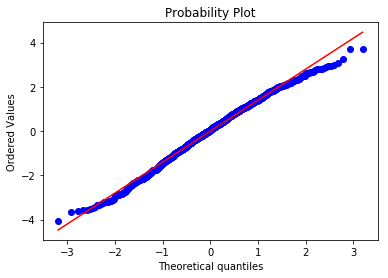

In [39]:
results = regress(X_,Y)
results.summary()
stats.probplot(results.resid, dist="norm", plot=plt);

De modo a verificar a existência de outliers nas vendas, fizemos os boxplot para as vendas de cada gênero:

In [40]:
tiro = dados_filtrado2013[dados_filtrado2013.Genre== 'Shooter']

In [41]:
acao = dados_filtrado2013[dados_filtrado2013.Genre == 'Action']

{'boxes': [<matplotlib.lines.Line2D at 0x1decfc037f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1decfc0b240>,
 'fliers': [<matplotlib.lines.Line2D at 0x1decfc0beb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1decfc0ba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1decfc03940>,
  <matplotlib.lines.Line2D at 0x1decfc03dd8>]}

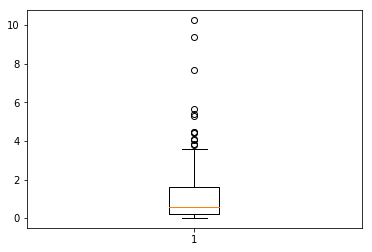

In [42]:
plt.boxplot(tiro["Global_Sales"])

{'boxes': [<matplotlib.lines.Line2D at 0x1decfc619e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1decfc6a438>,
 'fliers': [<matplotlib.lines.Line2D at 0x1decfc720f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1decfc6ac88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1decfc61b38>,
  <matplotlib.lines.Line2D at 0x1decfc61fd0>]}

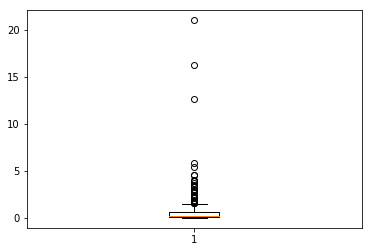

In [43]:
plt.boxplot(acao["Global_Sales"])

Diante dos resultados, percebemos que poderia haver uma melhora na distribuição se e no R-Squared se aplicassemos logarítmo nas vendas globais, normalizando a distribuição e diminuindo a influência dos outliers:

## Na célula seguinte foi aplicado Log no dataframe

In [13]:
import math

def classificacao(x):
    x=math.log(x)
    return x


In [14]:
df_final.Global_Sales=df_final.Global_Sales.apply(classificacao)

df_final

,Name,Global_Sales,Critic_Score,Action,Adventure,Fighting,Misc,Platform.,Puzzle,Racing,...,Telltale Games,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Unknown,Warner Bros. Interactive Entertainment,Xseed Games,Yacht Club Games,inXile Entertainment
16,Grand Theft Auto V,3.046425,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Grand Theft Auto V,2.789323,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Theft Auto V,2.534490,97.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,Call of Duty: Ghosts,2.327278,73.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,Call of Duty: Ghosts,2.236445,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,FIFA 16,2.148268,82.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Call of Duty: Advanced Warfare,2.036012,83.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,FIFA 17,2.026832,85.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Fallout 4,1.968510,87.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,Mario Kart 8,1.958685,88.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Reutilizando a função regress com a data atualizada:

In [15]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [16]:
A =df_final.drop(['Global_Sales','Name'], axis = 1)
#A.columns
X = df_final[['Critic_Score', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform.',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', '505 Games', 'Activision', 'Activision Blizzard',
       'Agatsuma Entertainment', 'Aksys Games', 'Alternative Software',
       'Arc System Works', 'ArtDink', 'Astragon', 'Atari', 'Atlus',
       'Avanquest', 'Bethesda Softworks', 'Bigben Interactive',
       'Bohemia Interactive', 'CCP', 'Capcom', 'City Interactive',
       'Codemasters', 'Compile Heart', 'Crytek', 'D3Publisher',
       'Daedalic Entertainment', 'Deep Silver', 'Devolver Digital',
       'Disney Interactive Studios', 'Dusenberry Martin Racing',
       'Electronic Arts', 'Focus Home Interactive', 'From Software', 'FuRyu',
       'FuRyu Corporation', 'Gearbox Software', 'GungHo',
       'Harmonix Music Systems', 'Headup Games', 'Hello Games', 'Idea Factory',
       'Idea Factory International', 'Insomniac Games',
       'Introversion Software', 'Kalypso Media', 'Koch Media',
       'Konami Digital Entertainment', 'Little Orbit', 'Majesco Entertainment',
       'Marvelous Entertainment', 'Marvelous Interactive', 'Microids',
       'Microsoft Game Studios', 'Milestone S.r.l', 'Milestone S.r.l.',
       'NCSoft', 'Namco Bandai Games', 'Nintendo', 'Nippon Ichi Software',
       'Nordic Games', 'PQube', 'Paradox Development', 'Paradox Interactive',
       'Rebellion Developments', 'Revolution Software', 'Rising Star Games',
       'Screenlife', 'Sega', 'Slightly Mad Studios', 'Sold Out',
       'Sony Computer Entertainment', 'Sony Computer Entertainment America',
       'Sony Computer Entertainment Europe', 'Square Enix', 'Stainless Games',
       'System 3', 'THQ', 'Take-Two Interactive', 'Tecmo Koei',
       'Telltale Games', 'Trion Worlds', 'Tripwire Interactive',
       'Tru Blu Entertainment', 'Ubisoft', 'Unknown',
       'Warner Bros. Interactive Entertainment', 'Xseed Games',
       'Yacht Club Games', 'inXile Entertainment']]
Y = df_final['Global_Sales']


Plotamos a tabela contendo os coeficientes:

In [17]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     8.514
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           4.48e-76
Time:                        10:45:06   Log-Likelihood:                -1501.6
No. Observations:                 991   AIC:                             3199.
Df Residuals:                     893   BIC:                             3679.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.5914      0.230    -19.960      0.000      -5.043      -4.140
Critic_Score                               0.0372      0.003     10.923      0.000       0.031       0.044
Action                                    -0.3260      0.097     -3.346      0.001      -0.517      -0.135
Adventure                                 -0.9106      0.205     -4.434      0.000      -1.314      -0.508
Fighting                                  -0.1784      0.201     -0.890      0.374      -0.572       0.215
Misc                                      -0.4951      0.189     -2.619      0.009      -0.866      -0.124
Platform.                                 -0.4936      0.175     -2.819      0.005      -0.837      -0.150
Puzzle                                    -1.7824      0.453     -3.936      0.000      -2.671      -0.894
Racing                                    -0.1794      0.212     -0.845      0.398      -0.596       0.237
Role-Playing                              -0.2042      0.138     -1.484      0.138      -0.474       0.066
Shooter                                    0.2302      0.127      1.810      0.071      -0.019       0.480
Simulation                                 0.4494      0.276      1.627      0.104      -0.093       0.991
Sports                                     0.1461      0.145      1.005      0.315      -0.139       0.431
Strategy                                  -0.8474      0.237     -3.572      0.000      -1.313      -0.382
505 Games                                 -0.1610      0.289     -0.557      0.578      -0.728       0.406
Activision                                 1.4034      0.181      7.760      0.000       1.048       1.758
Activision Blizzard                        0.9246      1.154      0.801      0.423      -1.340       3.190
Agatsuma Entertainment                    -1.1756      1.163     -1.011      0.312      -3.458       1.107
Aksys Games                               -0.4497      0.486     -0.926      0.355      -1.403       0.503
Alternative Software                      -1.1554      1.158     -0.998      0.319      -3.428       1.117
Arc System Works                           0.0391      0.684      0.057      0.954      -1.303       1.381
ArtDink                                   -1.0905      1.181     -0.923      0.356      -3.409       1.228
Astragon                                  -1.3793      0.860     -1.605      0.109      -3.066       0.308
Atari                                     -1.3704      1.184     -1.157      0.247      -3.694       0.953
Atlus                                      0.1639      0.533      0.308      0.758      -0.882       1.210
Avanquest                                 -0.7751      0.822     -0.943      0.346     

De fato, já é notável a melhora da distribuição, tendo o valor de R-squared dobrado e P>t melhores definidos

In [18]:
X_ = df_final[['Critic_Score']]

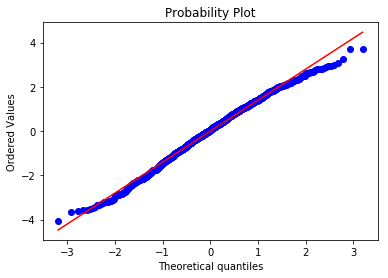

In [19]:
results = regress(X_,Y)
results.summary()
stats.probplot(results.resid, dist="norm", plot=plt);

Através do gráfico de resíduos acima, percebe-se uma melhora efetiva nos dados após o Log ser implementado

# O próximo passo para refinar ainda mais a regressão seria então extrair os elementos que influenciavam de maneira mínima no "Bi":

In [20]:
#Tirando p>t acima de 0.6

X_limpo = df_final[['Critic_Score', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform.',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', '505 Games', 'Activision', 'Activision Blizzard',
       'Agatsuma Entertainment', 'Aksys Games', 'Alternative Software',
        'ArtDink', 'Astragon', 'Atari',
       'Avanquest', 'Bethesda Softworks', 'CCP',  'City Interactive',
       'Codemasters', 'Compile Heart', 
       'Daedalic Entertainment', 'Deep Silver', 
       'Disney Interactive Studios', 'Dusenberry Martin Racing',
       'Electronic Arts', 'Focus Home Interactive',  'FuRyu',
       'FuRyu Corporation', 'Gearbox Software', 
       'Harmonix Music Systems', 'Headup Games', 'Hello Games', 'Idea Factory',
        'Insomniac Games',
       'Introversion Software', 'Kalypso Media', 'Koch Media',
       'Konami Digital Entertainment', 'Little Orbit', 'Majesco Entertainment',
        'Marvelous Interactive', 'Microids',
       'Microsoft Game Studios', 'Milestone S.r.l', 
        'Namco Bandai Games', 'Nintendo',
       'Nordic Games', 'PQube', 'Paradox Development', 'Paradox Interactive',
        'Revolution Software', 'Rising Star Games',
       'Screenlife', 'Sega', 'Slightly Mad Studios', 'Sold Out',
       'Sony Computer Entertainment', 'Sony Computer Entertainment America',
       'Sony Computer Entertainment Europe', 'Square Enix', 'Stainless Games',
       'System 3', 'THQ', 'Take-Two Interactive', 'Tecmo Koei',
       'Telltale Games', 'Trion Worlds', 'Tripwire Interactive',
       'Tru Blu Entertainment', 'Ubisoft', 'Unknown',
       'Warner Bros. Interactive Entertainment', 
       'Yacht Club Games', ]]

In [21]:
results = regress(X_limpo,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     10.47
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           4.78e-84
Time:                        10:45:08   Log-Likelihood:                -1502.6
No. Observations:                 991   AIC:                             3167.
Df Residuals:                     910   BIC:                             3564.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.6481      0.238    -19.547      0.000      -5.115      -4.181
Critic_Score                               0.0371      0.003     11.200      0.000       0.031       0.044
Action                                    -0.3275      0.093     -3.503      0.000      -0.511      -0.144
Adventure                                 -0.9038      0.196     -4.612      0.000      -1.288      -0.519
Fighting                                  -0.1636      0.193     -0.846      0.398      -0.543       0.216
Misc                                      -0.4945      0.186     -2.652      0.008      -0.860      -0.128
Platform.                                 -0.4956      0.173     -2.867      0.004      -0.835      -0.156
Puzzle                                    -1.8342      0.415     -4.422      0.000      -2.648      -1.020
Racing                                    -0.1777      0.192     -0.928      0.354      -0.554       0.198
Role-Playing                              -0.1953      0.124     -1.576      0.115      -0.438       0.048
Shooter                                    0.2203      0.122      1.802      0.072      -0.020       0.460
Simulation                                 0.4358      0.264      1.651      0.099      -0.082       0.954
Sports                                     0.1396      0.142      0.980      0.327      -0.140       0.419
Strategy                                  -0.8515      0.235     -3.619      0.000      -1.313      -0.390
505 Games                                 -0.0904      0.301     -0.301      0.764      -0.680       0.500
Activision                                 1.4738      0.198      7.451      0.000       1.086       1.862
Activision Blizzard                        0.9942      1.160      0.857      0.391      -1.282       3.270
Agatsuma Entertainment                    -1.1071      1.169     -0.947      0.344      -3.402       1.188
Aksys Games                               -0.3917      0.488     -0.803      0.422      -1.349       0.565
Alternative Software                      -1.0838      1.165     -0.930      0.352      -3.370       1.203
ArtDink                                   -1.0116      1.189     -0.851      0.395      -3.346       1.322
Astragon                                  -1.3013      0.868     -1.499      0.134      -3.005       0.402
Atari                                     -1.2943      1.192     -1.086      0.278      -3.633       1.044
Avanquest                                 -0.7089      0.829     -0.855      0.393      -2.335       0.917
Bethesda Softworks                         1.4505      0.304      4.777      0.000       0.855       2.046
CCP                                       -0.5820      1.162     -0.501      0.617     

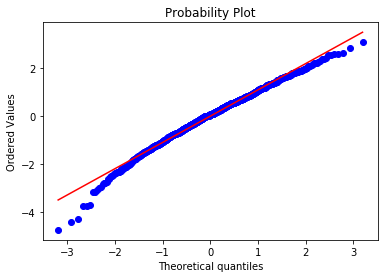

In [22]:
results = regress(X_limpo,Y)
results.summary()
stats.probplot(results.resid, dist="norm", plot=plt);

Novamente eliminaremos os P velhos dos novos resíduos

In [23]:
X_limpo_2 = df_final[['Critic_Score', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform.',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy',  'Activision', 'Activision Blizzard',
       'Agatsuma Entertainment', 'Aksys Games', 'Alternative Software',
        'ArtDink', 'Astragon', 'Atari',
       'Avanquest', 'Bethesda Softworks',   'City Interactive',
        'Compile Heart', 
        'Deep Silver', 
       'Disney Interactive Studios', 
       'Electronic Arts', 'Focus Home Interactive',  
       'FuRyu Corporation', 'Gearbox Software', 
       'Harmonix Music Systems',  'Hello Games', 
        'Insomniac Games',
       'Introversion Software', 'Kalypso Media', 'Koch Media',
       'Konami Digital Entertainment',  'Majesco Entertainment',
        'Marvelous Interactive', 'Microids',
       'Microsoft Game Studios', 'Milestone S.r.l', 
        'Namco Bandai Games', 'Nintendo',
       'Nordic Games', 'PQube', 'Paradox Development', 'Paradox Interactive',
         'Rising Star Games',
       'Screenlife', 'Sega', 'Slightly Mad Studios', 'Sold Out',
       'Sony Computer Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'Stainless Games',
       'System 3', 'THQ', 'Take-Two Interactive', 'Tecmo Koei',
       'Telltale Games', 'Trion Worlds', 'Tripwire Interactive',
       'Tru Blu Entertainment', 'Ubisoft', 'Unknown',
       'Warner Bros. Interactive Entertainment', 
       'Yacht Club Games', ]]

In [24]:
results = regress(X_limpo_2,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     12.18
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           4.25e-89
Time:                        10:45:09   Log-Likelihood:                -1504.7
No. Observations:                 991   AIC:                             3149.
Df Residuals:                     921   BIC:                             3492.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.6290      0.233    -19.857      0.000      -5.087      -4.172
Critic_Score                               0.0370      0.003     11.370      0.000       0.031       0.043
Action                                    -0.3268      0.093     -3.531      0.000      -0.508      -0.145
Adventure                                 -0.9640      0.183     -5.275      0.000      -1.323      -0.605
Fighting                                  -0.1665      0.192     -0.868      0.386      -0.543       0.210
Misc                                      -0.4936      0.186     -2.658      0.008      -0.858      -0.129
Platform.                                 -0.4955      0.172     -2.880      0.004      -0.833      -0.158
Puzzle                                    -1.8353      0.413     -4.444      0.000      -2.646      -1.025
Racing                                    -0.1159      0.160     -0.723      0.470      -0.431       0.199
Role-Playing                              -0.1895      0.120     -1.576      0.115      -0.425       0.047
Shooter                                    0.2127      0.120      1.774      0.076      -0.023       0.448
Simulation                                 0.4383      0.263      1.668      0.096      -0.077       0.954
Sports                                     0.1561      0.138      1.134      0.257      -0.114       0.426
Strategy                                  -0.8491      0.234     -3.625      0.000      -1.309      -0.389
Activision                                 1.4611      0.187      7.830      0.000       1.095       1.827
Activision Blizzard                        0.9806      1.153      0.850      0.395      -1.283       3.244
Agatsuma Entertainment                    -1.1211      1.163     -0.964      0.335      -3.404       1.162
Aksys Games                               -0.3895      0.482     -0.808      0.420      -1.336       0.557
Alternative Software                      -1.1148      1.158     -0.963      0.336      -3.387       1.157
ArtDink                                   -1.0285      1.183     -0.869      0.385      -3.351       1.294
Astragon                                  -1.3187      0.863     -1.528      0.127      -3.013       0.375
Atari                                     -1.3128      1.186     -1.107      0.269      -3.641       1.015
Avanquest                                 -0.7337      0.823     -0.891      0.373      -2.350       0.882
Bethesda Softworks                         1.4363      0.297      4.841      0.000       0.854       2.019
City Interactive                           0.5150      0.594      0.867      0.386      -0.651       1.681
Compile Heart                             -1.2403      1.154     -1.075      0.283     

Novamente filtraremos e avaliar o R-ajustado:

In [25]:
X_limpo_3 = df_final[['Critic_Score', 'Action', 'Adventure',  'Misc', 'Platform.',
       'Puzzle',  'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy',  'Activision', 
          'Astragon', 'Atari',
        'Bethesda Softworks',   
        'Compile Heart', 
        'Deep Silver', 
       'Disney Interactive Studios', 
       'Electronic Arts', 'Focus Home Interactive',  
       'FuRyu Corporation', 'Gearbox Software', 
       'Harmonix Music Systems',  'Hello Games', 
       'Introversion Software', 'Kalypso Media', 'Koch Media',
       'Konami Digital Entertainment', 
         'Microids',
       'Microsoft Game Studios', 'Milestone S.r.l', 
        'Namco Bandai Games', 'Nintendo',
       'Nordic Games', 'Paradox Development', 'Paradox Interactive',
       'Screenlife', 'Sega', 'Sold Out',
       'Sony Computer Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'Stainless Games',
       'System 3', 'THQ', 'Take-Two Interactive', 'Tecmo Koei',
       'Telltale Games', 'Trion Worlds', 'Tripwire Interactive',
       'Tru Blu Entertainment', 'Ubisoft', 'Unknown',
       'Warner Bros. Interactive Entertainment', 
       'Yacht Club Games', ]]

In [26]:
def regress2(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [27]:
results = regress(X_limpo_3,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     15.16
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           4.96e-95
Time:                        10:45:11   Log-Likelihood:                -1510.1
No. Observations:                 991   AIC:                             3132.
Df Residuals:                     935   BIC:                             3407.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.7809      0.261    -18.316      0.000      -5.293      -4.269
Critic_Score                               0.0373      0.003     11.674      0.000       0.031       0.044
Action                                    -0.2265      0.142     -1.592      0.112      -0.506       0.053
Adventure                                 -0.8983      0.213     -4.214      0.000      -1.317      -0.480
Misc                                      -0.3632      0.227     -1.603      0.109      -0.808       0.082
Platform.                                 -0.4246      0.213     -1.991      0.047      -0.843      -0.006
Puzzle                                    -1.7321      0.461     -3.761      0.000      -2.636      -0.828
Role-Playing                              -0.0963      0.159     -0.607      0.544      -0.408       0.215
Shooter                                    0.3330      0.168      1.980      0.048       0.003       0.663
Simulation                                 0.4855      0.301      1.612      0.107      -0.105       1.076
Sports                                     0.2404      0.186      1.294      0.196      -0.124       0.605
Strategy                                  -0.7529      0.280     -2.686      0.007      -1.303      -0.203
Activision                                 1.4896      0.181      8.238      0.000       1.135       1.844
Astragon                                  -1.2302      0.857     -1.435      0.152      -2.913       0.453
Atari                                     -1.2201      1.181     -1.033      0.302      -3.537       1.097
Bethesda Softworks                         1.4643      0.293      4.994      0.000       0.889       2.040
Compile Heart                             -1.1977      1.151     -1.041      0.298      -3.456       1.061
Deep Silver                                0.5107      0.218      2.348      0.019       0.084       0.938
Disney Interactive Studios                 1.5602      0.524      2.978      0.003       0.532       2.588
Electronic Arts                            1.4111      0.167      8.472      0.000       1.084       1.738
Focus Home Interactive                    -0.3518      0.335     -1.050      0.294      -1.009       0.306
FuRyu Corporation                         -1.1988      1.155     -1.038      0.300      -3.466       1.068
Gearbox Software                          -1.7996      0.820     -2.194      0.028      -3.409      -0.190
Harmonix Music Systems                     1.3554      0.835      1.623      0.105      -0.284       2.995
Hello Games                                2.8903      1.149      2.516      0.012       0.636       5.144
Introversion Software                     -1.9199      0.816     -2.352      0.019     

In [28]:
results = regress2(X_limpo_3,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     26.87
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          3.97e-155
Time:                        10:45:11   Log-Likelihood:                -1662.1
No. Observations:                 991   AIC:                             3434.
Df Residuals:                     936   BIC:                             3704.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Critic_Score                              -0.0131      0.002     -6.920      0.000      -0.017      -0.009
Action                                    -1.1981      0.154     -7.792      0.000      -1.500      -0.896
Adventure                                 -1.8667      0.241     -7.758      0.000      -2.339      -1.394
Misc                                      -1.3345      0.257     -5.199      0.000      -1.838      -0.831
Platform.                                 -1.2816      0.242     -5.286      0.000      -1.757      -0.806
Puzzle                                    -2.5970      0.534     -4.866      0.000      -3.644      -1.550
Role-Playing                              -0.9190      0.177     -5.180      0.000      -1.267      -0.571
Shooter                                   -0.7706      0.183     -4.213      0.000      -1.130      -0.412
Simulation                                -0.6385      0.343     -1.859      0.063      -1.312       0.035
Sports                                    -1.0315      0.201     -5.136      0.000      -1.426      -0.637
Strategy                                  -1.6691      0.321     -5.194      0.000      -2.300      -1.039
Activision                                 1.3355      0.210      6.346      0.000       0.922       1.748
Astragon                                  -1.9648      0.998     -1.969      0.049      -3.923      -0.006
Atari                                     -2.7105      1.372     -1.975      0.049      -5.404      -0.017
Bethesda Softworks                         1.6564      0.341      4.852      0.000       0.986       2.326
Compile Heart                             -2.2336      1.339     -1.668      0.096      -4.862       0.395
Deep Silver                               -0.5097      0.245     -2.081      0.038      -0.991      -0.029
Disney Interactive Studios                 1.2881      0.610      2.111      0.035       0.091       2.485
Electronic Arts                            1.5838      0.194      8.175      0.000       1.204       1.964
Focus Home Interactive                    -1.0881      0.388     -2.807      0.005      -1.849      -0.327
FuRyu Corporation                         -2.2389      1.344     -1.666      0.096      -4.877       0.399
Gearbox Software                          -1.7736      0.956     -1.856      0.064      -3.649       0.102
Harmonix Music Systems                     1.5010      0.973      1.542      0.123      -0.409       3.411
Hello Games                                2.6583      1.338      1.987      0.047       0.032       5.284
Introversion Software                     -1.8496      0.951     -1.945      0.052      -3.716       0.016
Kalypso Media                             -0.8040      0.585     -1.374      0.170     